# Yugang Create at April 14, 2017 @CHX, NSLS-II

In [5]:
from chxanalys.chx_packages import *
%matplotlib notebook

In [6]:
cd ~/Analysis/Cube_Packing/

/home/yuzhang/Analysis/Cube_Packing


In [112]:
%run Minkowski_Octohedrons.py

# Description for Minkowski

John T. Robinson of Yorktown Heights NY points out that the optimal lattice packing of regular octahedra was determined by Minkowski in 1904. The packing is obtained by translating the octahedron with vertices (±,1,0,0), (0,±1,0), (0,0,±1) using the lattice generated by the vectors (2/3,1,1/3), (−1/3,−2/3,1), and (−1,1/3,−2/3). A portion of such a packing is shown below (figure due to Torquato and Jiao). It has a density of 18/19. An exposition on optimal lattice packings of archimedean solids by Torquato and Jiao is here. It appears that the optimal packing of regular octahedra is a lattice packing (see "Dense Packings of the Platonic and Archimedean Solids" by S. Torquato and Y. Jiao, Nature 460, 876-879, available here).

###  Minkowski Lattices 

* base vectors

In [9]:
v1, v2, v3  = (2/3,1,1/3), (-1/3,-2/3,1), (-1,1/3, -2/3)  #for Minkowski Lattice

* Angles between vectors

In [10]:
get_vec_angle( v1, v2 ), get_vec_angle( v1, v3 ),get_vec_angle( v2, v3 )

(110.92483242763834, 110.92483242763834, 110.92483242763834)

* vector length

In [11]:
get_vecLen(v1),get_vecLen(v2),get_vecLen(v3)

(1.247219128924647, 1.247219128924647, 1.247219128924647)

###  BCC Lattices  (Zig-Zag is a BCC lattice with cubes in a particular rotation )

* base vectors

In [12]:
v1, v2, v3  = (1/2,1/2,1/2), (-1/2,-1/2,1/2),(1/2,-1/2,-1/2) #for BCC Lattice

* Angles between vectors

In [13]:
get_vec_angle( v1, v2 ), get_vec_angle( v1, v3 ),get_vec_angle( v2, v3 )

(109.47122063449069, 109.47122063449069, 109.47122063449069)

* vector length

In [14]:
get_vecLen(v1),get_vecLen(v2),get_vecLen(v3)

(0.8660254037844386, 0.8660254037844386, 0.8660254037844386)

# Diffraction Analysis

### 1) plane distance of Minkowski lattice

In [15]:
hm=5

In [243]:
a= 10  
b=a
c=a
ang_MK = 110.92483242763834  #109.47122063449069
alp=ang_MK
bet = alp
gam = alp



In [17]:
dc_MK =  get_hkl_dis(a, b, c, alp, bet, gam, hm, hm,hm)
d_MK = np.array( list( sorted(dc_MK.keys(), reverse=True) ))
p_MK = d_MK[0]/d_MK 

In [18]:
#p_MK

### 2) plane distance of BCC lattice

In [244]:
a= 10  
b=a
c=a
ang_BCC = 109.47122063449069
alp = ang_BCC
bet = alp
gam = alp

In [20]:
dc_BCC =  get_hkl_dis(a, b, c, alp, bet, gam, hm, hm,hm)
d_BCC = np.array( list( sorted(dc_BCC.keys(), reverse=True) ))
p_bcc = d_BCC[0]/d_BCC 


In [21]:
#p_bcc

### 3) plot Sq with BCC/MK peaks

In [22]:
data = np.loadtxt(  '/home/yuzhang/Analysis/Cube_Packing/CB_L70.dat'  )
q = data[:,0]
sq = data[:,1]

<IPython.core.display.Javascript object>


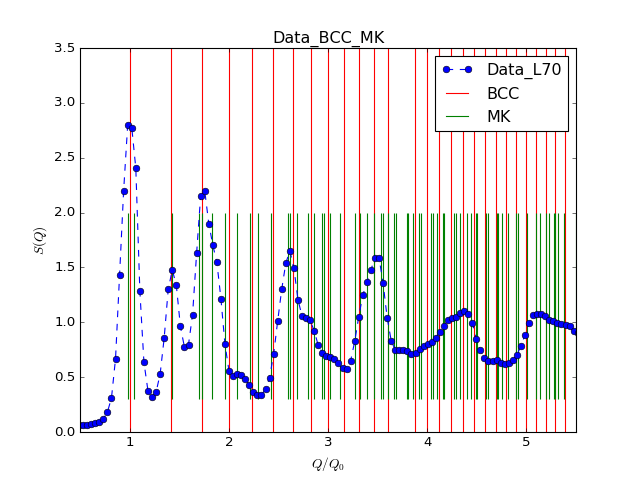

In [23]:
fig, ax = plt.subplots()
ax.vlines( p_bcc,  ymin=0, ymax=3.5, colors='r', linestyles='solid', label='BCC')
ax.vlines( p_MK *0.98,  ymin=0.3, ymax=2, lw=1, colors='g', linestyles='solid', label='MK')
plot1D( x = q/0.009788 , y= sq, m='o', c='b', ls='--', ax=ax, legend='Data_L70', title='Data_BCC_MK'  )
ax.set_xlim( 0.5, 5.5)
#ax.set_xlabel(  r'$Q($' + r'$\AA^{-1})$'  )
ax.set_xlabel(  r'$Q/Q_0$'  )
ax.set_ylabel(  r'$S(Q)$'   )

# Conclusion

* The Minkowski (MK) lattice is not a BCC lattice!
* It is hard to tell wheter a BCC or MK from our SAXS pattern



## ToDoList

* Calculate volume fraction of the two lattice (is there any reason to form a MK?)
* Visulize MK of cube if possible
* Fit SQ using MK model ?

## Volume Fraction of Octahedron in a MK lattice 

Note:
* octohedron edge length sqrt(2), i.e., height=2 
* one octa volume: 8/6
    
* MK la= 1.247219128924647# get_vecLen(  (-1/3,-2/3,1)  )
* alp = 110.92483242763834
* MK unit cell volume  get_cell_vol(a, a, a, alp, alp, alp)

In [194]:
La_MK= get_vecLen(  (-1/3,-2/3,1)  )
alp = 110.92483242763834
VF_OC_MK = get_octa_vol(1)*1/get_cell_vol(La_MK, La_MK, La_MK, alp, alp, alp)
print( 'The calculated volume fraction of octahedron in a MK lattice is: %s'%VF_OC_MK)
print('The theoretical value is: %s'%(18/19))

The calculated volume fraction of octahedron in a MK lattice is: 0.947368421053
The theoretical value is: 0.9473684210526315


In [195]:
D_ins_in_octa = np.sqrt(3)*2/3

In [202]:
print("The diameter of an inscribed sphere is: %s."%( D_ins_in_octa ))
#inscribed sphere --> tangent to each of the octahedron's faces
print("The diameter of a sphere in MK is: %s."%( La_MK ))

The diameter of an inscribed sphere is: 1.15470053838.
The diameter of a sphere in MK is: 1.24721912892.


In [213]:
alp =  110.92483242763834  #109.47122063449069 #60
get_sphere_vol(  La_MK/2 ) / get_cell_vol(La_MK, La_MK, La_MK, alp, alp, alp)

0.72178371499800931

## Volume Fraction of Cubes in ZZ-BCC/MK lattice 

* How to make rhombic lattice from cubes

Cubes pack in a rhombic lattice ( Angle_vector = angle) in the following way, 
Staring  from a SC attice, 

In x-y plane, center cube at (0,0,0) and cube at (1,1,0) don't move, so based on this two center distance and the target angle, the lattice contant La is defined. La = (np.sqrt(2)/2*size)/cos( np.radians(angle /2 ) ) 
Cube at (1,0,0) shifts along x and -y -axis both Delta (=La*np.sin( np.radians(angle /2 -45)), Cube at (0,1,) also shift along -x,y Delta

In z-direction, cube at (0,0,1) along x,y to make angle and La same as in xy plane. Due to the symmetry, this cube shoud shift to (-0.5, -0.5, z )

* Plot volume fraction of cube in rhombic lattice as a function of rhombic angle

In [474]:
ang_BCC, ang_MK

(109.47122063449069, 110.92483242763834)

In [565]:
N=1000
angs=np.zeros(N)
las=np.zeros(N)
vfs =np.zeros(N)
v3_z = np.zeros(N)
for i, ang in enumerate(np.linspace(90, 118, N)):
    #print( 1, ang, get_La_rhombic_by_cubes(ang, 1), get_vf_rhombic_by_cubes( ang ))
    p1,p2,p3 = get_vec_rhombic_by_cubes(ang, 1)
    #print( 2, get_vecLen(p1), get_vecLen(p2),get_vecLen(p3) )
    #print( 3, get_vec_angle(p1,p2),get_vec_angle(p2,p3),get_vec_angle(p3,p1) )
    #print(p3)
    angs[i], las[i], vfs[i], v3_z[i] = [ ang, get_La_rhombic_by_cubes(ang, 1),
                              get_vf_rhombic_by_cubes( ang ), p3[2] ]

In [651]:
#np.where(v3_z<=1)[0][1], np.argmin(vfs)
vfs[np.argmin(vfs)]

0.70710688041259884

109.479479479


<IPython.core.display.Javascript object>


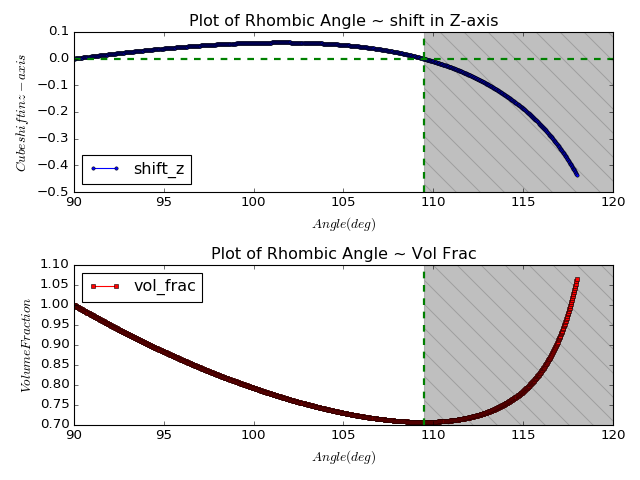

In [525]:
ang_ = angs[np.argmin(vfs)]
print(ang_)
fig, ax = plt.subplots(2)

#plot1D( x=angs, y= las -1, m='o',  c= 'b', ax=ax[0], legend='shift_x/y', markersize=3)
plot1D( x=angs, y= v3_z-1, m='o',  c= 'b', ax=ax[0], legend='shift_z', markersize=3,
        title='Plot of Rhombic Angle ~ shift in Z-axis', xlabel=r'$Angle (deg)$', ylabel=r'$Cube shift in z-axis$')
ax[0].axhline(y= 0, xmin= 0, xmax = 120, linewidth=2,ls='--', color='g')
ax[0].axvline(x= ang_, ymin=0, ymax = 1, linewidth=2, ls='--',color='g')

p1= patches.Rectangle(
       (ang_, -0.6), 15, 1,
        hatch='\\',
        fill= True,
        color='grey',
        alpha=.5,
    )
ax[0].add_patch(p1)


plot1D( x= angs, y = vfs, m='s', c='r', ax=ax[1], legend='vol_frac', markersize=3,
       title=r'Plot of Rhombic Angle ~ Vol Frac', xlabel=r'$Angle (deg)$', ylabel=r'$Volume Fraction$')
ax[1].axvline(x= ang_, ymin=0, ymax = 1, linewidth=2, ls='--',color='g',)
#ax[1].axhline(y= 1.0, xmin= 0, xmax = 120, linewidth=1,ls='--', color='g')
p= patches.Rectangle(
       (ang_, 0.5), 15, 0.6,
        hatch='\\',
        fill= True,
        color='grey',
        alpha=.5,
    )
ax[1].add_patch(p)
plt.tight_layout()

* The turn over angle is exactly the BCC angle (109.47122063449069)
* above this angle, there would be an overlap between cubes in z-direction
* This is not possible, but only if cube corners are rounded!

In [482]:
%run Minkowski_Octohedrons.py

# Visualize MK of Octohedrons


In [240]:
%run Minkowski_Octohedrons.py

<IPython.core.display.Javascript object>


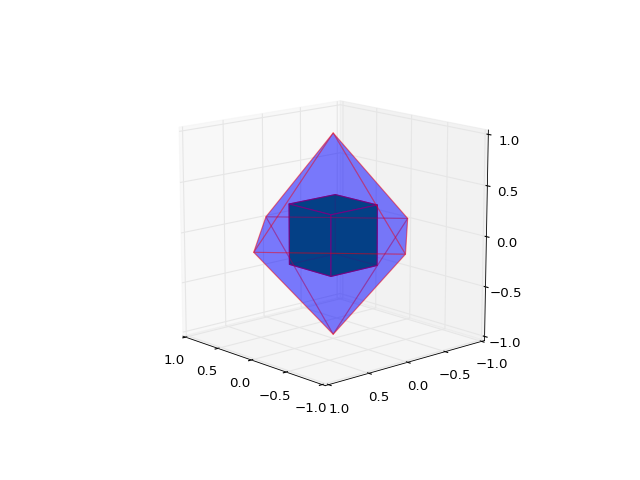

(-1, 1)

In [239]:
fig = plt.figure ()
ax = fig.add_subplot (1, 1, 1, projection = '3d', aspect = 1)
center = [0,0,0] 
threeD_octa(ax=ax, size=1, center=center, facecolor='blue', edgecolor='red', alpha=.3)
#threeD_ball(ax=ax, size=La_MK/2, center=center, edgecolor='red',  facecolor='red', alpha=1)
threeD_cube(ax=ax, size=.3, center=center, facecolor='green', edgecolor='red', alpha=.8)

lim= 1
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)

In [527]:
La_MK/2

0.62360956446232352

<IPython.core.display.Javascript object>


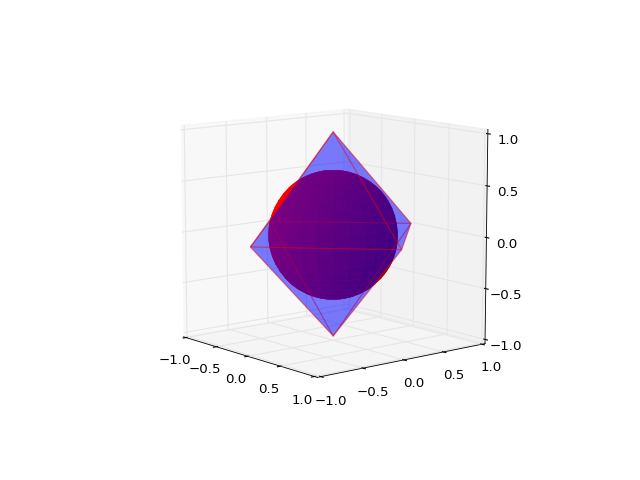

(-1, 1)

In [526]:
fig = plt.figure ()
ax = fig.add_subplot (1, 1, 1, projection = '3d', aspect = 1)
center = [0,0,0] 

threeD_octa(ax=ax, size=1, center=center, facecolor='blue', edgecolor='red', alpha=.3)
threeD_ball(ax=ax, size=La_MK/2, center=center, edgecolor='red',  facecolor='red', alpha=1)
#threeD_cube(ax=ax, size=.3, center=center, facecolor='green', edgecolor='red', alpha=.8)
lim= 1
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)

<IPython.core.display.Javascript object>


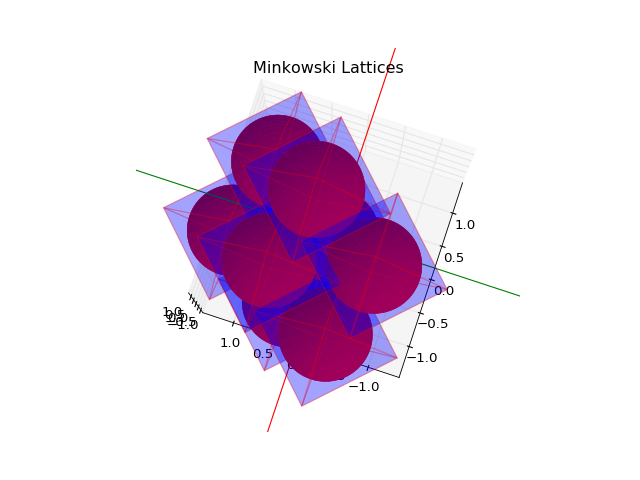

In [221]:
fig = plt.figure ()
ax = fig.add_subplot (1, 1, 1, projection = '3d', aspect = 1)
for center in MK_lattice(la=La_MK): 
    threeD_octa(ax=ax, size=1.0, center=center, facecolor='blue', edgecolor='red', alpha=.2)
    threeD_ball(ax=ax, size=La_MK/2, center=center, edgecolor='red',  facecolor='red', alpha=1)

#threeD_line(ax=ax,leng=4, color='green')
show_coorxyz( ax=ax, leng=4 )
lim= 1.4
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)
ax.set_title('Minkowski Lattices')


# Visualize MK of Cubes

In [660]:
p_mk= MK_lattice(la=1)

In [662]:
v1,v2,v3 = p_mk[1], p_mk[2],p_mk[3]
print(v1,v2,v3)
print( get_vec_angle(v1,v2), get_vec_angle(v1,v3),get_vec_angle(v3,v2) )
print( get_vecLen(v1),get_vecLen(v2),  get_vecLen(v3),     )

[ 0.53452248  0.80178373  0.26726124] [-0.26726124 -0.53452248  0.80178373] [-0.80178373  0.26726124 -0.53452248]
110.924832428 110.924832428 110.924832428
1.0 1.0 1.0


In [677]:
v1

array([ 0.53452248,  0.80178373,  0.26726124])

In [723]:
size =  v1[1] #v1[0] #v1[1]
Vc = size**3
angle = ang_MK
a= 1
Vcell = get_cell_vol(a, a, a, angle, angle, angle)
print( Vc/Vcell)

0.710526315789


##### Note: This volume fraction is larger than zzBCC, But there is an overlap between the corner-coner cubes!!!

In [682]:
v1,v2,v3

(array([ 0.53452248,  0.80178373,  0.26726124]),
 array([-0.26726124, -0.53452248,  0.80178373]),
 array([-0.80178373,  0.26726124, -0.53452248]))

In [687]:
v1+v2 +v3

array([-0.53452248,  0.53452248,  0.53452248])

In [697]:
get_vecLen(v1+v2)/np.sqrt(2)

0.80178372573727308

In [698]:
get_vecLen(v1+v2+v3)/np.sqrt(3)

0.53452248382484879

In [715]:
v1

array([ 0.53452248,  0.80178373,  0.26726124])

<IPython.core.display.Javascript object>


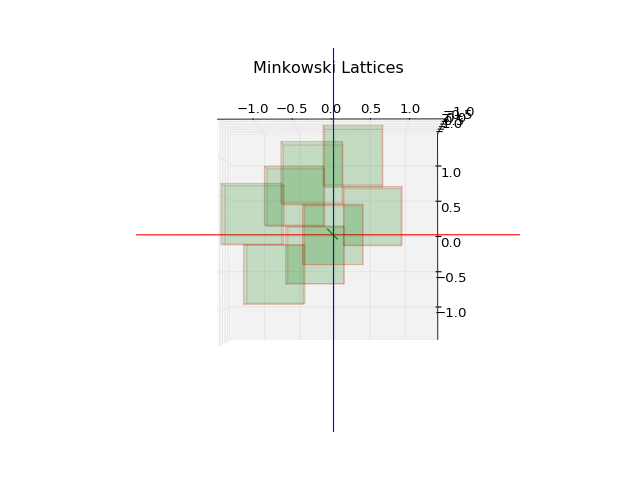

[ 0.  0.  0.]
[ 0.53452248  0.80178373  0.26726124]
[-0.26726124 -0.53452248  0.80178373]
[-0.80178373  0.26726124 -0.53452248]
[ 0.26726124  0.26726124  1.06904497]
[-1.06904497 -0.26726124  0.26726124]
[-0.26726124  1.06904497 -0.26726124]
[-0.53452248  0.53452248  0.53452248]


In [724]:
fig = plt.figure ()
ax = fig.add_subplot (1, 1, 1, projection = '3d', aspect = 1)
for center in MK_lattice(la=1): 
#for center in [ [0,0,0], v3+v1 ] :     
    #threeD_octa(ax=ax, size=1.0, center=center, facecolor='blue', edgecolor='red', alpha=.2)
    #threeD_ball(ax=ax, size=La_MK/2, center=center, edgecolor='red',  facecolor='red', alpha=1)
    print(center)
    threeD_cube(ax=ax, size= v1[1]/2, center=center, facecolor='green', edgecolor='red', alpha=.1)

#threeD_line(ax=ax,leng=4, color='green')
show_coorxyz( ax=ax, leng=4 )
lim= 1.4
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)
ax.set_title('Minkowski Lattices')
